## Place Cell Analysis 

## Goal #1: Detect place cells? Cells that have a preference to locations on the track.

## Goal #2: Look at the formation of place cells. Is there a burst of activity that indicates the beginning or formation of a place field? Can consider looking at the data in reverse, from end to beginning.

## Goal #3: Are place cells stable over time? Across days or even remapping during the same session?

In [12]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

mat = scipy.io.loadmat('../../../CaImAn/demos/notebooks/Results/02-03cnmfe.mat')

## Time Syncing

# Behavior @ 30 hz
Time = 1675462020.79345

Behavioral Start: 932

Behavioral End = 27190

Behavioral Frame Duration = 27190 - 932 = 26258

Behavioral Time Duration = 26258 / 30 frames = 875.266666667

Behavior Frames = 30 frames / sec = 0.03 ms

1 second / 30 frames

= 0.0333 sec/frame


932/30 = 31.0667 seconds


Behavior New Zero = 31.0667 seconds


Behavior New Zero Frame = 932


# Miniscope @ 10 hz
Time = 1675462016784

Miniscope Frames = 10 frames / sec = 0.01 ms

1 sec / 10 frames

= 0.1 sec/frame


Miniscope New Zero = 31.0667 (s) - t_delta = 27.05721650278015 s


Mini New Zero Frame = 270.5721650278015 = 271

Miniscope End Time = 1675462926068

Miniscope End Frames =  9028




In [121]:
import datetime
t_mini = 1675462016784/1000
t_behav = 1675462020.79345
dt_mini = datetime.datetime.fromtimestamp(t_mini)
dt_behav = datetime.datetime.fromtimestamp(t_behav)

print("Miniscope: ", dt_mini)
print("Behavior: ", dt_behav)

t_delta = t_behav - t_mini

print("Time Delta = ", t_delta, "s")
print("Time Delta (ms) = ", t_delta*1000, "ms")

print("\n")

t_new_behav = 1675462020.79345 + 31.0667
dt_new_behav = datetime.datetime.fromtimestamp(t_new_behav)
print("Behavior New Zero: ", dt_new_behav)

t_new_mini = t_mini + 27.05721650278015
dt_new_mini = datetime.datetime.fromtimestamp(t_new_mini)
print("Miniscope New Zero: ", dt_new_mini)

print("\n")

t_mini_end = 1675462926068/1000
dt_mini_end = datetime.datetime.fromtimestamp(t_mini_end)
print("Miniscope End: ", dt_mini_end)
mini_delta = t_mini_end - t_new_mini
print("Mini Time Delta Sec = ", mini_delta, "s")
print("Mini Time Delta Min = ", mini_delta/60, "m")

print("\n")

t_behav_end = t_new_behav + 875.266666667
dt_behav_end = datetime.datetime.fromtimestamp(t_behav_end)
print("Behav End: ", dt_behav_end)
behav_delta = 875.266666667
print("Behav Time Delta Sec = ", behav_delta, "s")
print("Behav Time Delta Min = ", behav_delta/60, "m")

print("\n")

end_delta = t_behav_end - t_mini_end

print("End Time Delta Sec = ", end_delta, "s")


if (behav_delta < mini_delta):
    print("Behavior Data Ends First")
else:
    print("Miniscope Data Ends First")
    
behav_frames = 26258

print("\n")

print("Offset Miniscope Frames by 271, or 27 seconds")
mini_offset = 271



Miniscope:  2023-02-03 16:06:56.784000
Behavior:  2023-02-03 16:07:00.793450
Time Delta =  4.009450197219849 s
Time Delta (ms) =  4009.4501972198486 ms


Behavior New Zero:  2023-02-03 16:07:31.860150
Miniscope New Zero:  2023-02-03 16:07:23.841216


Miniscope End:  2023-02-03 16:22:06.068000
Mini Time Delta Sec =  882.2267837524414 s
Mini Time Delta Min =  14.703779729207357 m


Behav End:  2023-02-03 16:22:07.126817
Behav Time Delta Sec =  875.266666667 s
Behav Time Delta Min =  14.587777777783334 m


End Time Delta Sec =  1.05881667137146 s
Behavior Data Ends First


Offset Miniscope Frames by 271, or 27 seconds


## Behavior and Calcium Data

Num Frames: 8753 8753


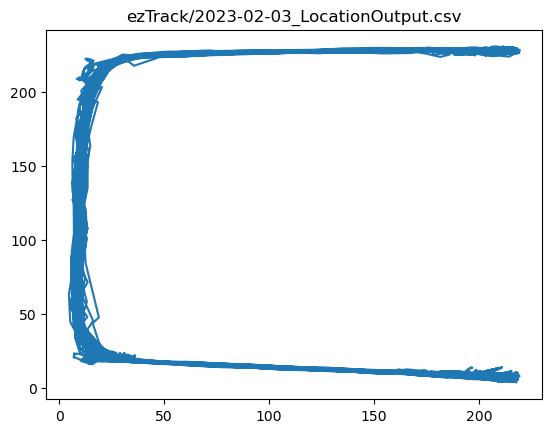

In [132]:
from os.path import dirname, join as pjoin
import scipy.io as sio
import matplotlib.pyplot as plt
import csv

csv_fname = "ezTrack/2023-02-03_LocationOutput.csv"

file = open(csv_fname)
csvreader = csv.reader(file)
x_val = []
y_val = []
for row in csvreader:
    if row[7] != 'X': # skip the first row
        x_val.append(float(row[7])) 
        y_val.append(float(row[8]))


# Skip every two values to sync with miniscope data

x = x_val[::3]
y = y_val[::3]

behav_frames = len(x)

print("Num Frames:", len(x), len(y))

plt.plot(x, y)
plt.title(csv_fname)
plt.show()

(120, 8753)


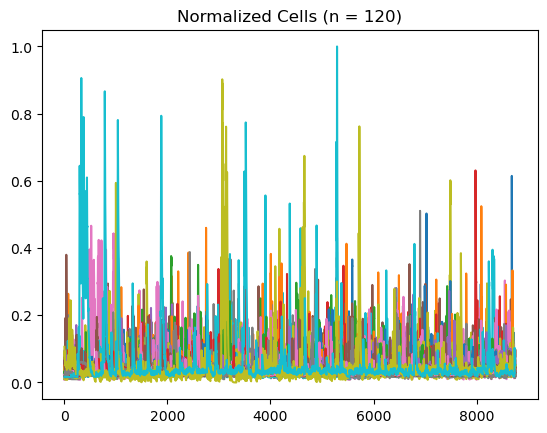

In [155]:
d = mat['C']

# Account for time adjustment
data = d[:,mini_offset:]
end_diff = np.abs(np.shape(data)[1] - behav_frames)*-1

data = d[:,mini_offset:end_diff]

x_normed = (data-np.min(data))/(np.max(data)-np.min(data))

print(np.shape(x_normed))
plt.plot(x_normed.T)
plt.title("Normalized Cells (n = " + str(np.shape(x_normed)[0]) + ")")
plt.show()

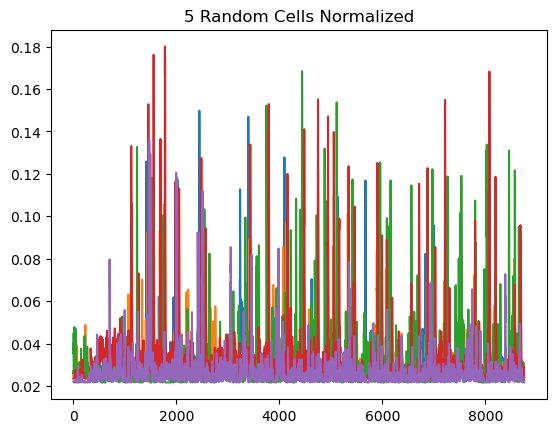

In [156]:
randos = np.random.randint(1,101,5)

for i in randos:
    plt.plot(x_normed[i])

plt.title("5 Random Cells Normalized")
plt.show()


In [162]:
# plt.plot(x, x_normed[0])
# plt.show()

## Past Code

In [4]:
# import scipy.io
# import matplotlib.pyplot as plt
# import numpy as np
# from scipy import stats

# mat = scipy.io.loadmat('2023-01-16/synced_activity.mat')

In [20]:
# # Getting some sample neurons

# n1 = np.array(mat['n1'][0].tolist())
# n10 = np.array(mat['n10'][0].tolist())
# n25 = np.array(mat['n25'][0].tolist())
# n33 = np.array(mat['n33'][0].tolist())
# n45 = np.array(mat['n45'][0].tolist())

In [22]:
# xvals = np.array(mat['xvals'][0].tolist())
# yvals = np.array(mat['yvals'][0].tolist())

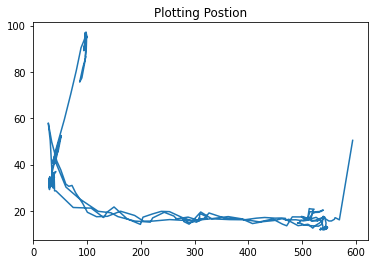

In [41]:
# plt.plot(xvals,yvals)
# plt.title("Plotting Postion")
# plt.show()

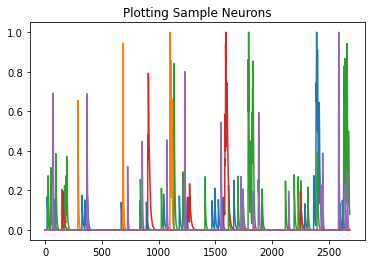

In [42]:
# # Maybe a good idea to normalize fluoresence data
# # Could be across all neurons, or per ROI

# def normalize(x):
#     x_norm = (x-np.min(x))/(np.max(x)-np.min(x))
#     return x_norm

# plt.plot(normalize(n1))
# plt.plot(normalize(n10))
# plt.plot(normalize(n25))
# plt.plot(normalize(n33))
# plt.plot(normalize(n45))
# plt.title("Plotting Sample Neurons")
# plt.show()

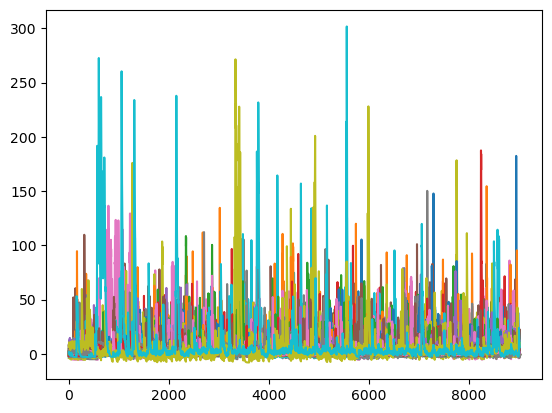

In [21]:
# data = mat['C'].T

# def normalize(x):
#     x_norm = (x-np.min(x))/(np.max(x)-np.min(x))
#     return x_norm

# data_norm = 

# plt.plot(mat['C'].T)
# plt.show()

In [39]:
# # How does correlation between neurons look? - might want this to be low, because a high correlation implies ROIs are overlapping too much?

# # Y and Z are numpy arrays or lists of variables 
# print(stats.pearsonr(n1, n10))
# print(stats.pearsonr(n1, n25))
# print(stats.pearsonr(n1, n45))

# # Result comes out as
# # (statistic, p-value)

(-0.02450705551183939, 0.20426953626266808)
(0.033739656216065624, 0.08046907848644032)
(-0.009034803927898745, 0.6398218775276494)
